In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('covtype.csv')
print(len(df))
df.head()

581012


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
print(df.columns, len(df.columns))
y = df.Cover_type

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_distance_to_hydrology',
       'Vertical_distance_to_hydrology', 'Horizontal_distance_to_roadways',
       'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm',
       'Horizontal_distance_to_fire', 'Wilderness_area1', 'Wilderness_area2',
       'Wilderness_area3', 'Wilderness_area4', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cov

Have to de-one-hot-encode for just the eda process. Will use original data afterwards.

In [5]:
temp = pd.from_dummies(df.iloc[:,10:14]).rename(columns={'':'Wilderness_area'})
temp = temp.replace("Wilderness_area1", 1)
temp = temp.replace("Wilderness_area2", 2)
temp = temp.replace("Wilderness_area3", 3)
temp = temp.replace("Wilderness_area4", 4) 
temp.Wilderness_area.value_counts()
temp.head()

/tmp/ipykernel_1283252/898707270.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace("Wilderness_area4", 4)


,Wilderness_area
0,1
1,1
2,1
3,1
4,1


Now for the soil columns

In [6]:
temp_soil = pd.from_dummies(df.iloc[:, 14:54]).rename(columns={'':'Soil_type'})


In [7]:
for i in range(1,41):
    temp_soil = temp_soil.replace(f'Soil_Type{i}', i)
temp_soil['Soil_type'].head()

/tmp/ipykernel_1283252/3478535466.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_soil = temp_soil.replace(f'Soil_Type{i}', i)


0    29
1    29
2    12
3    30
4    29
Name: Soil_type, dtype: int64

Now for joining them all into my final EDA df

In [8]:
eda = df.drop(df.columns[10:], axis = 1)

eda = eda.join([temp, temp_soil, y])
print(eda.columns, len(eda.columns))
eda.head()


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_distance_to_hydrology',
       'Vertical_distance_to_hydrology', 'Horizontal_distance_to_roadways',
       'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm',
       'Horizontal_distance_to_fire', 'Wilderness_area', 'Soil_type',
       'Cover_type'],
      dtype='object') 13


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,Wilderness_area,Soil_type,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


<Axes: >

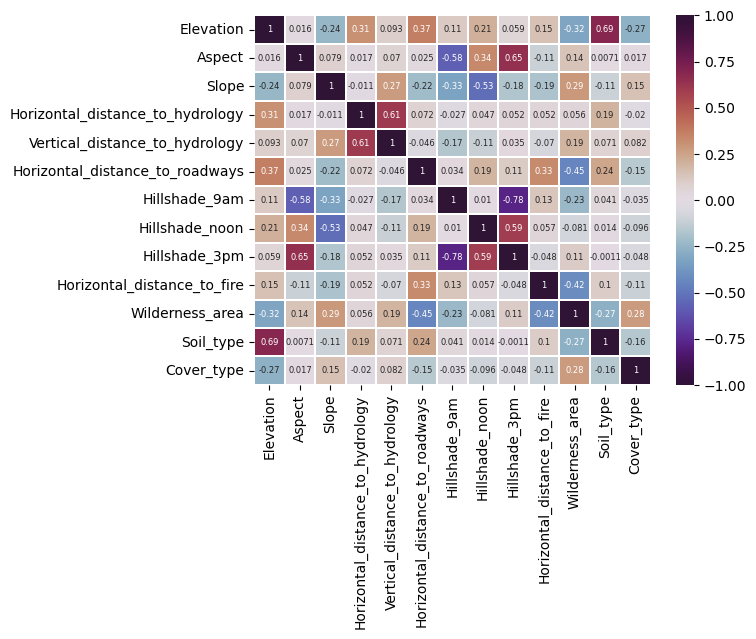

In [9]:
#correlation matrix
#note: done before normalizing the variables just to take a good look at everything right off the bat
#ignore 
import seaborn as sns

corr_matrix = eda.corr(method='pearson', min_periods=1)

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.1, annot_kws={"fontsize":6}, cmap='twilight_shifted')

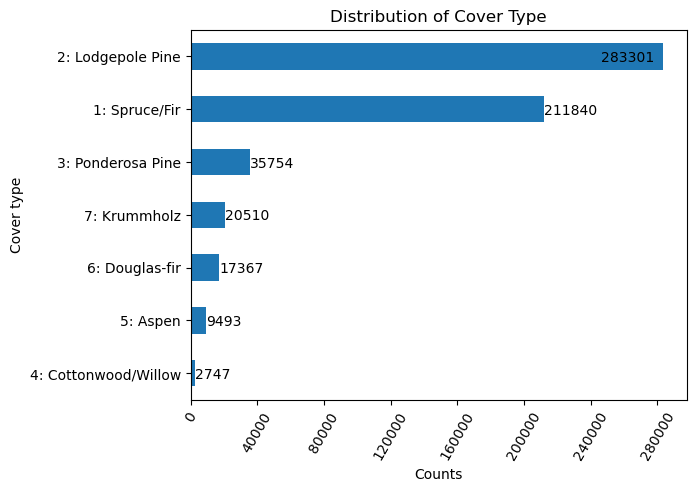

In [10]:
import matplotlib.pyplot as plt

cover_type_dict = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

#target variable histogram
eda['Cover_type'].value_counts(ascending=True).plot.barh(rot=0)
plt.title('Distribution of Cover Type')
plt.ylabel('Cover type')
plt.yticks(ticks = range(0,7), labels=[str(i)+': '+cover_type_dict[i] for i in list(eda.Cover_type.value_counts(ascending=True).keys())], rotation = 0)
plt.xticks(ticks=range(0,300000, 40000), rotation=60)
plt.xlabel('Counts')
for index, value in enumerate(eda['Cover_type'].value_counts(ascending=True)):
    if value>250000:
        plt.text(value/1.15, index-.1, str(value))
    else:
        plt.text(value, index-.1, str(value))
plt.show()

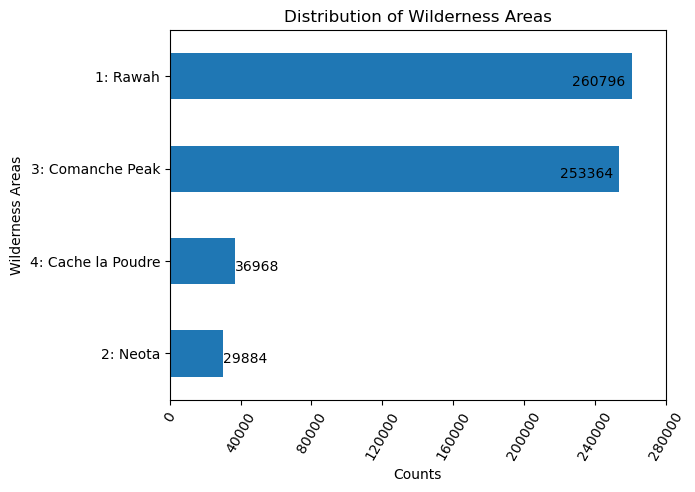

In [11]:
wilderness_area_dict = {
    1: 'Rawah',
    2: 'Neota',
    3: 'Comanche Peak',
    4: 'Cache la Poudre'
}

#target variable histogram
eda['Wilderness_area'].value_counts(ascending=True).plot.barh(rot=0)
plt.title('Distribution of Wilderness Areas')
plt.ylabel('Wilderness Areas')
plt.yticks(ticks = range(0,4), labels=[str(i)+': '+wilderness_area_dict[i] for i in list(eda.Wilderness_area.value_counts(ascending=True).keys())], rotation = 0)
plt.xticks(ticks=range(0,300000, 40000), rotation=60)
plt.xlabel('Counts')
for index, value in enumerate(eda['Wilderness_area'].value_counts(ascending=True)):
    if value>250000:
        plt.text(value/1.15, index-.1, str(value))
    else:
        plt.text(value, index-.1, str(value))
plt.show()

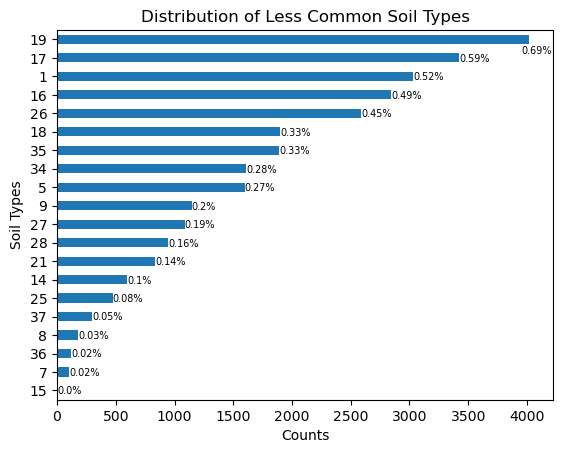

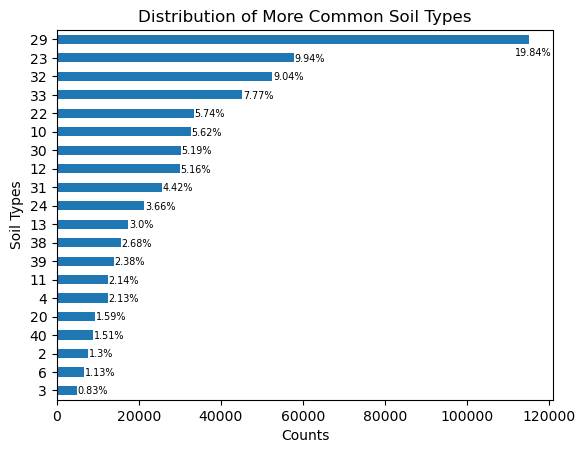

In [12]:
#target variable histogram
eda['Soil_type'].value_counts(ascending=True)[0:20].plot.barh(rot=0)
plt.title('Distribution of Less Common Soil Types')
plt.ylabel('Soil Types')
plt.xlabel('Counts')
for index, value in enumerate(eda['Soil_type'].value_counts(ascending=True)[0:20]):
    if value >3700:
        plt.text(value-70, index-.8, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
    else:
        plt.text(value, index-.2, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
plt.show()
plt.show()

eda['Soil_type'].value_counts(ascending=True)[20:40].plot.barh(rot=0)
plt.title('Distribution of More Common Soil Types')
plt.ylabel('Soil Types')
plt.xlabel('Counts')
for index, value in enumerate(eda['Soil_type'].value_counts(ascending=True)[20:40]):
    if value >100000:
        plt.text(value-3500, index-.9, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
    else:
        plt.text(value+200, index-.2, f'{round(value/len(eda)*100, 2)}%', fontsize='x-small')
plt.show()

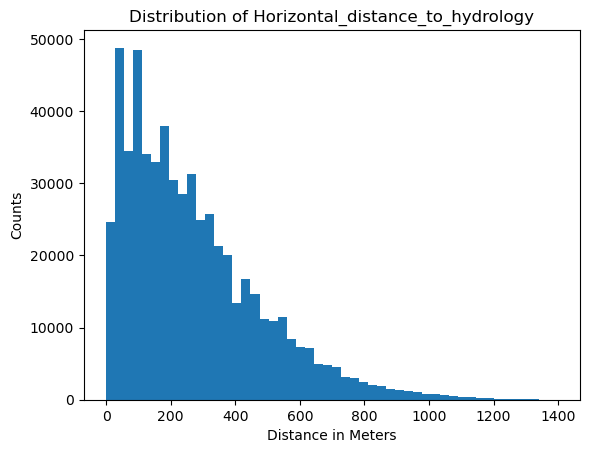

count    581012.000000
mean        269.428217
std         212.549356
min           0.000000
25%         108.000000
50%         218.000000
75%         384.000000
max        1397.000000
Name: Horizontal_distance_to_hydrology, dtype: float64


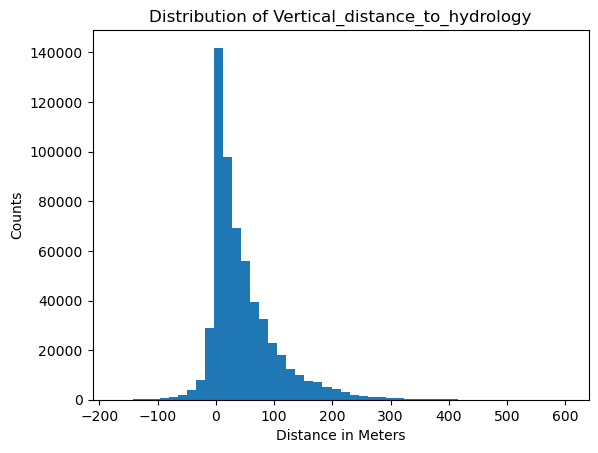

count    581012.000000
mean         46.418855
std          58.295232
min        -173.000000
25%           7.000000
50%          30.000000
75%          69.000000
max         601.000000
Name: Vertical_distance_to_hydrology, dtype: float64


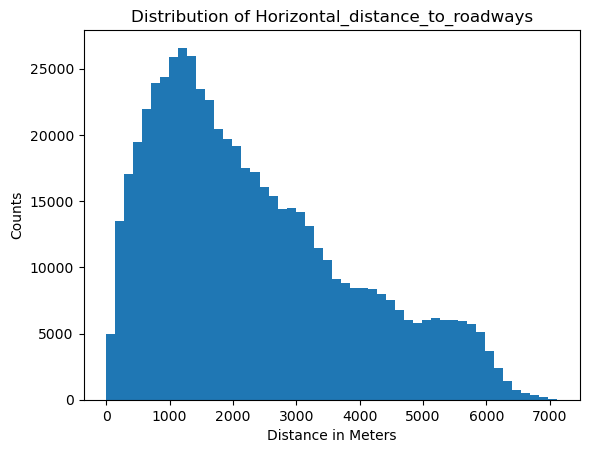

count    581012.000000
mean       2350.146611
std        1559.254870
min           0.000000
25%        1106.000000
50%        1997.000000
75%        3328.000000
max        7117.000000
Name: Horizontal_distance_to_roadways, dtype: float64


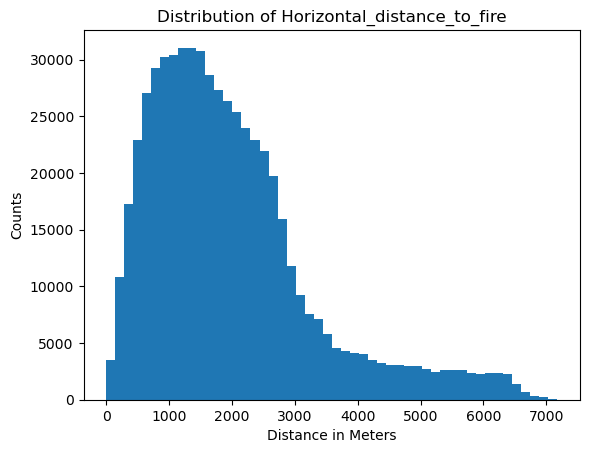

count    581012.000000
mean       1980.291226
std        1324.195210
min           0.000000
25%        1024.000000
50%        1710.000000
75%        2550.000000
max        7173.000000
Name: Horizontal_distance_to_fire, dtype: float64


In [13]:
# for loops to makes histograms of features adapted to x units
for i in eda.columns[3:6]:
    plt.hist(eda[i],bins=50)
    plt.title(f'Distribution of {i}')
    plt.xlabel('Distance in Meters')
    plt.ylabel('Counts')
    plt.show()
    print(eda[i].describe())

plt.hist(eda['Horizontal_distance_to_fire'], bins=50)
plt.title('Distribution of Horizontal_distance_to_fire')
plt.xlabel('Distance in Meters')
plt.ylabel('Counts')
plt.show()
print(eda['Horizontal_distance_to_fire'].describe())

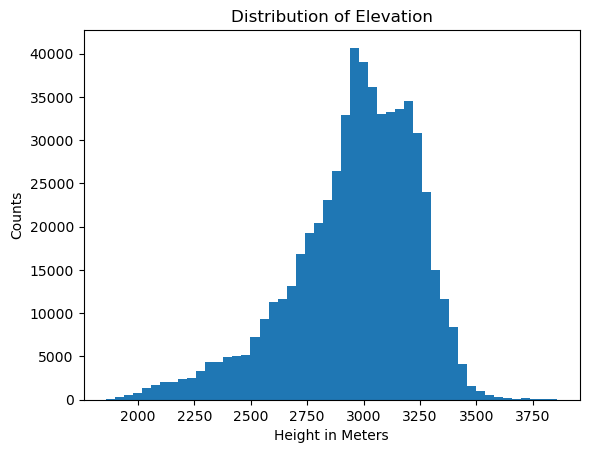

count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64


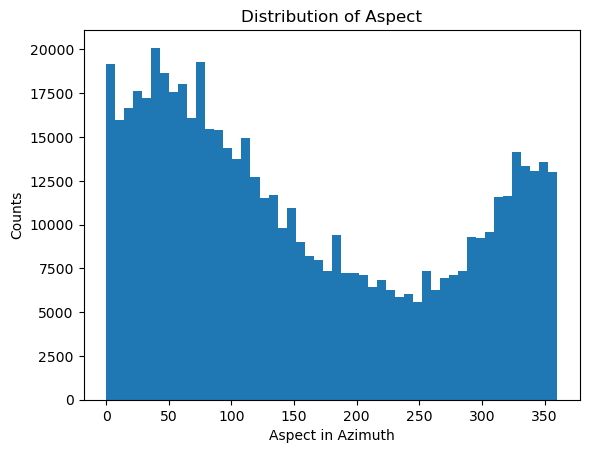

count    581012.000000
mean        155.656807
std         111.913721
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64


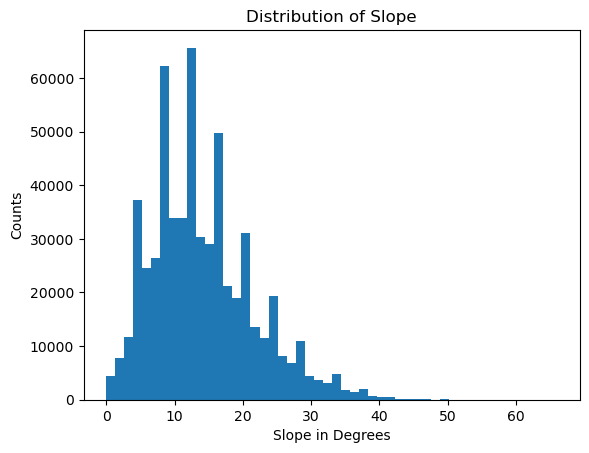

count    581012.000000
mean         14.103704
std           7.488242
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64


In [14]:
#3 features: elevation, aspect, slope
plt.hist(eda['Elevation'], bins=50)
plt.title('Distribution of Elevation')
plt.xlabel('Height in Meters')
plt.ylabel('Counts')
plt.show()
print(eda['Elevation'].describe())

plt.hist(eda['Aspect'], bins=50)
plt.title('Distribution of Aspect')
plt.xlabel('Aspect in Azimuth')
plt.ylabel('Counts')
plt.show()
print(eda['Aspect'].describe())

plt.hist(eda['Slope'], bins=50)
plt.title('Distribution of Slope')
plt.xlabel('Slope in Degrees')
plt.ylabel('Counts')
plt.show()
print(eda['Slope'].describe())

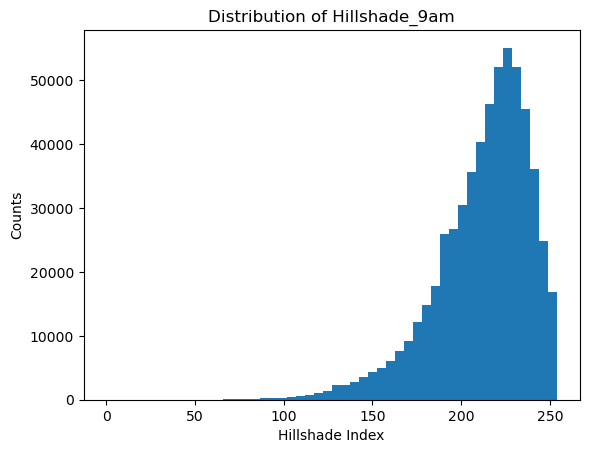

count    581012.000000
mean        212.146049
std          26.769889
min           0.000000
25%         198.000000
50%         218.000000
75%         231.000000
max         254.000000
Name: Hillshade_9am, dtype: float64


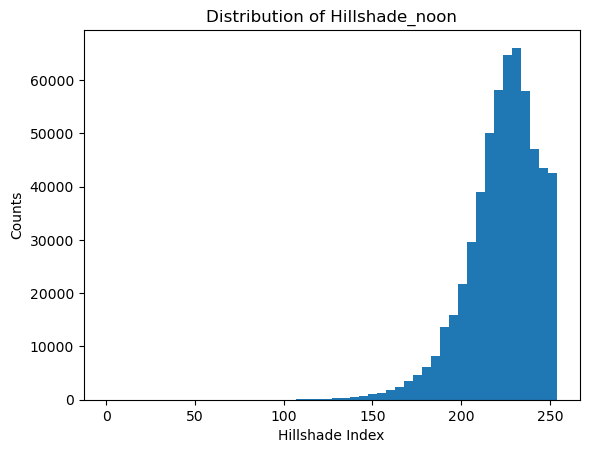

count    581012.000000
mean        223.318716
std          19.768697
min           0.000000
25%         213.000000
50%         226.000000
75%         237.000000
max         254.000000
Name: Hillshade_noon, dtype: float64


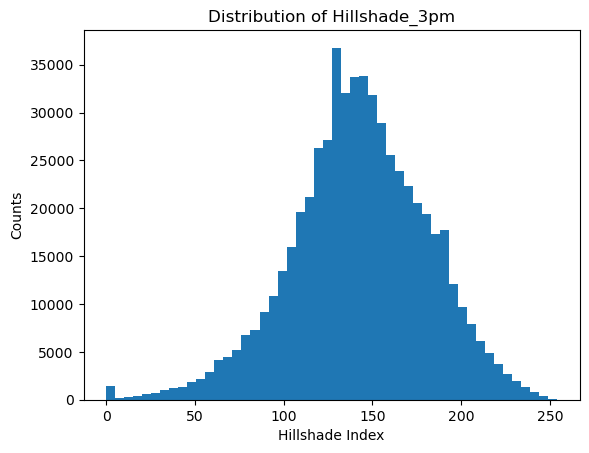

count    581012.000000
mean        142.528263
std          38.274529
min           0.000000
25%         119.000000
50%         143.000000
75%         168.000000
max         254.000000
Name: Hillshade_3pm, dtype: float64


In [15]:
#the hillshade histograms
for i in eda.columns[6:9]:
    plt.hist(eda[i],bins=50)
    plt.title(f'Distribution of {i}')
    plt.xlabel(f'Hillshade Index')
    plt.ylabel('Counts')
    plt.show()
    print(eda[i].describe())

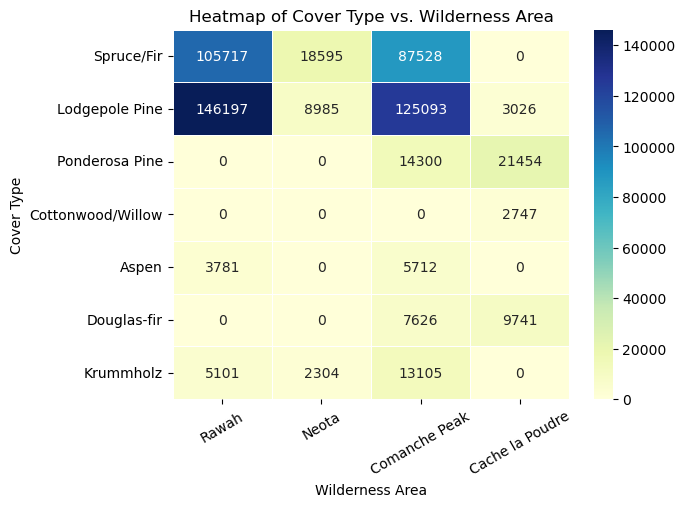

In [16]:
crosstab_wilderness = pd.crosstab(eda['Cover_type'], eda['Wilderness_area'])

#heatmap for wilderness and covertype
sns.heatmap(crosstab_wilderness, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g')
plt.title('Heatmap of Cover Type vs. Wilderness Area')
plt.xlabel('Wilderness Area')
plt.xticks(ticks=[i + .5 for i in range(0,4)], labels=list(wilderness_area_dict.values()), rotation=30)
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()

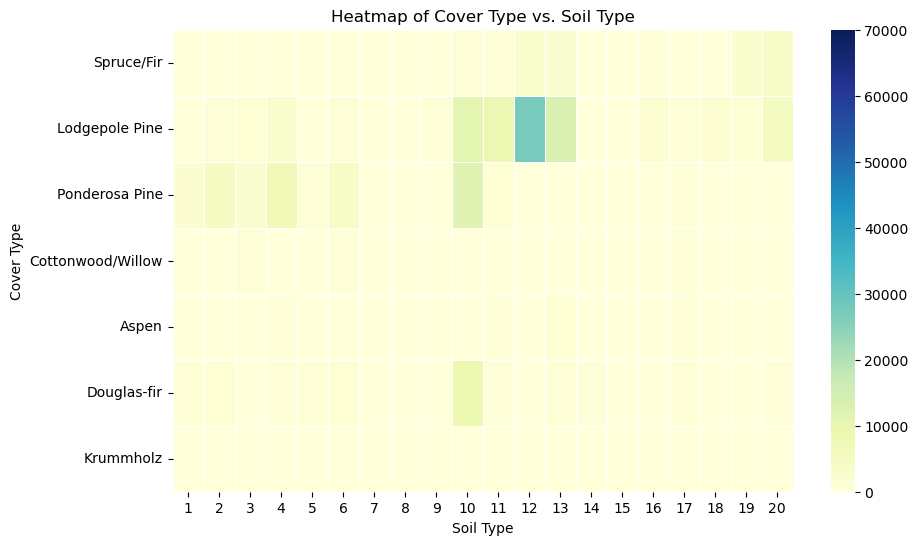

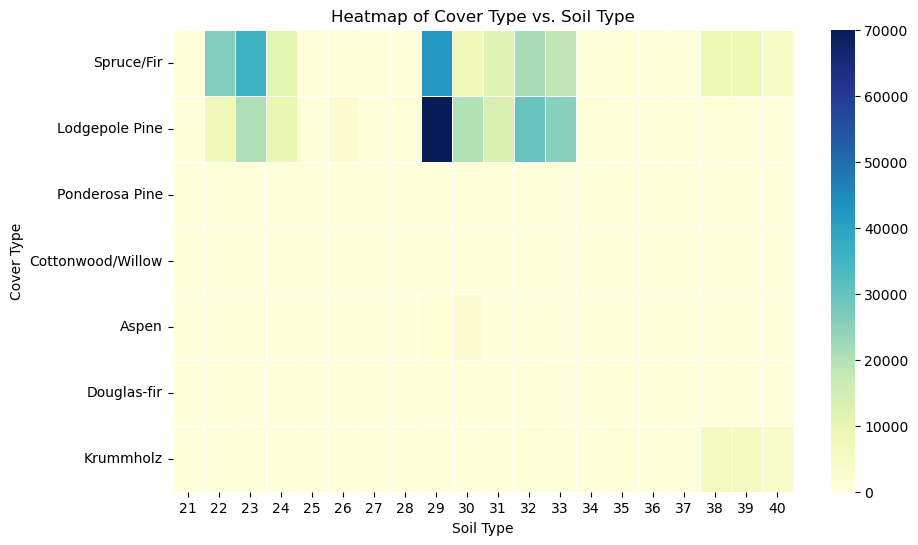

In [17]:
crosstab_soil = pd.crosstab(eda['Cover_type'], eda['Soil_type'])
crosstab_soil1 = crosstab_soil.iloc[:, :20]
crosstab_soil2 = crosstab_soil.iloc[:, 20:]

#heatmaps for soil and covertype
plt.figure(figsize=(10,6))
sns.heatmap(crosstab_soil1, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g', vmax=70000, vmin=0)
plt.title('Heatmap of Cover Type vs. Soil Type')
plt.xlabel('Soil Type')
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(crosstab_soil2, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5, fmt='g', vmax=70000, vmin=0)
plt.title('Heatmap of Cover Type vs. Soil Type')
plt.xlabel('Soil Type')
plt.yticks(ticks=[i + .5 for i in range(0, 7)], labels=list(cover_type_dict.values()),rotation=0)
plt.ylabel('Cover Type')
plt.show()


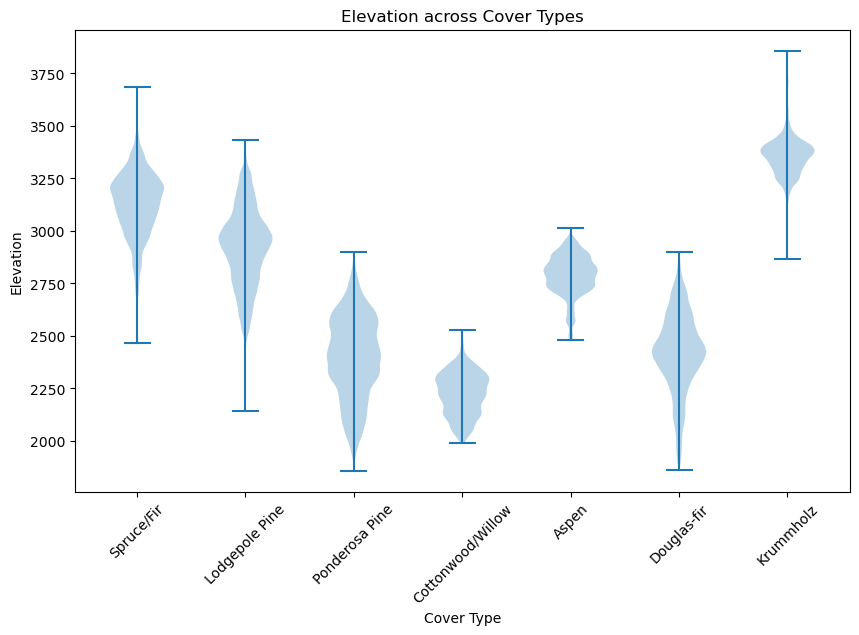

In [18]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Elevation'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Elevation')
plt.xlabel('Cover Type')
plt.title('Elevation across Cover Types')
plt.show()
    

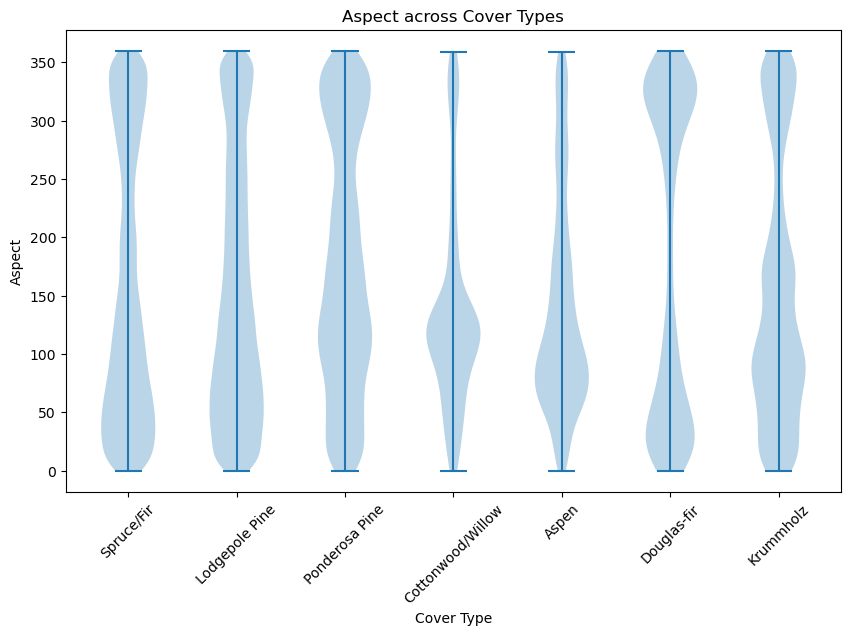

In [19]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Aspect'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Aspect')
plt.xlabel('Cover Type')
plt.title('Aspect across Cover Types')
plt.show()

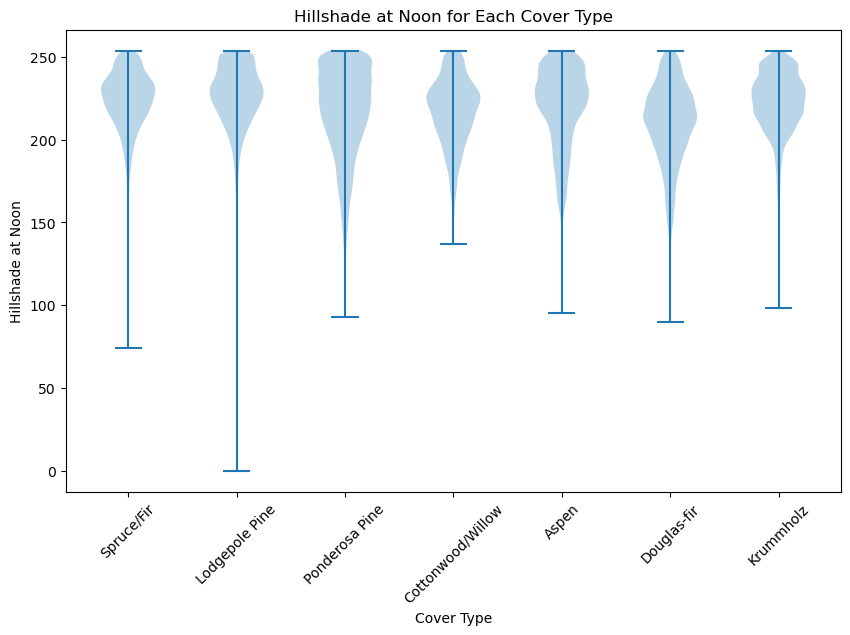

In [20]:
violins =[]
for i in sorted(eda.Cover_type.unique()):
    violins.append(eda[eda['Cover_type'] == i]['Hillshade_noon'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,7)],labels = list(cover_type_dict.values()), rotation = 45)
plt.ylabel('Hillshade at Noon')
plt.xlabel('Cover Type')
plt.title('Hillshade at Noon for Each Cover Type')
plt.show()

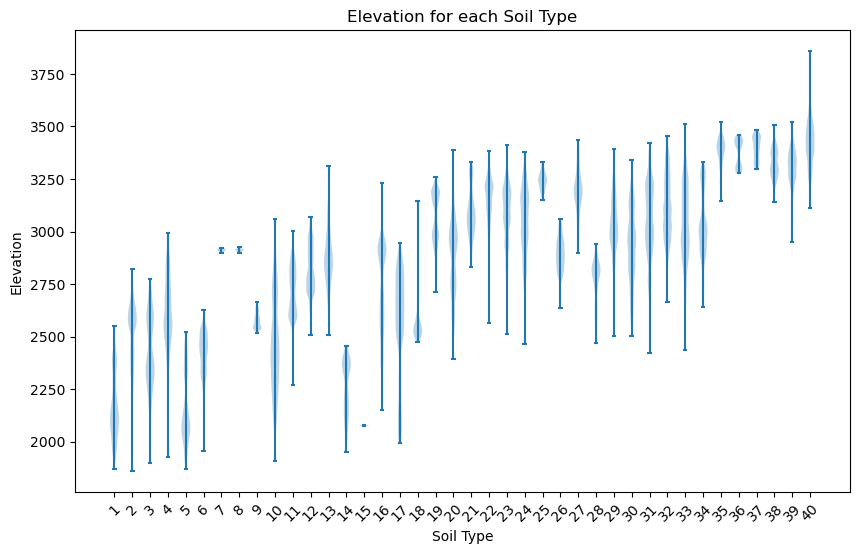

In [21]:
violins =[]
for i in sorted(eda.Soil_type.unique()):
    violins.append(eda[eda['Soil_type'] == i]['Elevation'].values)

plt.figure(figsize=(10, 6))

plt.violinplot(dataset = violins)
plt.xticks([i + 1 for i in range(0,40)],labels = sorted(eda.Soil_type.unique()), rotation = 45)
plt.ylabel('Elevation')
plt.xlabel('Soil Type')
plt.title('Elevation for each Soil Type')
plt.show()

In [22]:
#now doing Chi squared tests for the 3 categorical variables
#unlikely to yield great results due to high counts of zeroes in some categories of the crosstab
from scipy.stats import chi2_contingency

#first for the target variable
#between Cover Type and Soil Type
contingency_table_1 = pd.crosstab(eda['Cover_type'], eda['Soil_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table_1)

print("Chi-squared test between Cover Type and Soil Type:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

print("------")
#between Cover Type and Wilderness Area
contingency_table_2 = pd.crosstab(eda['Cover_type'], eda['Wilderness_area'])
chi2, p, dof, expected = chi2_contingency(contingency_table_2)

print("Chi-squared test between Cover Type and Wilderness Area:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

print("------")
#now for the 2 non-target variables
#between Soil Type and Wilderness Area
contingency_table_3 = pd.crosstab(eda['Soil_type'], eda['Wilderness_area'])
chi2, p, dof, expected = chi2_contingency(contingency_table_3)

print("Chi-squared test between Soil Type and Wilderness Area:")
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

Chi-squared test between Cover Type and Soil Type:
Chi2: 762246.5215596666, p-value: 0.0, Degrees of Freedom: 234
------
Chi-squared test between Cover Type and Wilderness Area:
Chi2: 342443.42784904334, p-value: 0.0, Degrees of Freedom: 18
------
Chi-squared test between Soil Type and Wilderness Area:
Chi2: 819289.809222796, p-value: 0.0, Degrees of Freedom: 117


In [23]:
import scipy.stats as stats
group1 = df[df['Wilderness_area1'] == 1]['Elevation']
group2 = df[df['Wilderness_area2'] == 1]['Elevation']
group3 = df[df['Wilderness_area3'] == 1]['Elevation']
group4 = df[df['Wilderness_area4'] == 1]['Elevation']
f_stat, p_value = stats.f_oneway(group2, group4)
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')    

F-statistic: 820521.4195016457
P-value: 0.0


__**SPLITTING AND PREPROCESSING**__

In [24]:
#back to working with original df because categoricals are already one-hot encoded
df.head()

,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop(columns='Cover_type')
print(y.head())
X.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_type, dtype: int64


,Elevation,Aspect,Slope,Horizontal_distance_to_hydrology,Vertical_distance_to_hydrology,Horizontal_distance_to_roadways,Hillshade_9am,Hillshade_noon,Hillshade_3pm,Horizontal_distance_to_fire,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Because a lot of the data is imbalanced, I will be using stratification in the splitting process
random_state = 42

#stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

#StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

print('Training size', y_train.shape, f'({round(y_train.shape[0]/len(y),4)*100}%)')
print('Validation Size', y_val.shape, f'({round(y_val.shape[0]/len(y),4)*100}%)')
print('Testing Size', y_test.shape, f'({round(y_test.shape[0]/len(y),4)*100}%)')

test balance: (array([1, 2, 3, 4, 5, 6, 7]), array([42368, 56661,  7151,   549,  1899,  3473,  4102]))
new fold
(array([1, 2, 3, 4, 5, 6, 7]), array([127104, 169980,  21452,   1649,   5695,  10420,  12306]))
(array([1, 2, 3, 4, 5, 6, 7]), array([42368, 56660,  7151,   549,  1899,  3474,  4102]))
new fold
(array([1, 2, 3, 4, 5, 6, 7]), array([127104, 169980,  21453,   1648,   5695,  10421,  12306]))
(array([1, 2, 3, 4, 5, 6, 7]), array([42368, 56660,  7150,   550,  1899,  3473,  4102]))
new fold
(array([1, 2, 3, 4, 5, 6, 7]), array([127104, 169980,  21452,   1648,   5696,  10421,  12306]))
(array([1, 2, 3, 4, 5, 6, 7]), array([42368, 56660,  7151,   550,  1898,  3473,  4102]))
new fold
(array([1, 2, 3, 4, 5, 6, 7]), array([127104, 169980,  21452,   1649,   5696,  10420,  12306]))
(array([1, 2, 3, 4, 5, 6, 7]), array([42368, 56660,  7151,   549,  1898,  3474,  4102]))
Training size (348607,) (60.0%)
Validation Size (116202,) (20.0%)
Testing Size (116203,) (20.0%)


**Preprocessing Pipeline After Splitting**

In [27]:
minmax_ftrs = ['Aspect', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm']
std_ftrs = ['Elevation', 'Slope', 'Horizontal_distance_to_hydrology', 
            'Vertical_distance_to_hydrology', 
            'Horizontal_distance_to_roadways', 'Horizontal_distance_to_fire']


preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
        remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = pd.DataFrame(clf.fit_transform(X_train), 
                            columns=X_train.columns)
X_val_prep = pd.DataFrame(clf.transform(X_val), 
                          columns=X_val.columns)
X_test_prep = pd.DataFrame(clf.transform(X_test), 
                           columns=X_test.columns)


#standard scaler for everything

preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), X.columns)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = pd.DataFrame(clf.fit_transform(X_train_prep), 
                            columns=X_train.columns)
X_val_prep = pd.DataFrame(clf.transform(X_val_prep), 
                          columns=X_val.columns)
X_test_prep = pd.DataFrame(clf.transform(X_test_prep), 
                           columns=X_test.columns)


print('X_train shape:', X_train.shape)
print('X_train_prep shape:', X_train_prep.shape)
print('---')
print('X_val shape:', X_val.shape)
print('X_val_prep shape:', X_val_prep.shape)
print('---')
print('X_test shape:', X_test.shape)
print('X_test_prep shape:', X_test_prep.shape)



X_train shape: (348607, 54)
X_train_prep shape: (348607, 54)
---
X_val shape: (116202, 54)
X_val_prep shape: (116202, 54)
---
X_test shape: (116203, 54)
X_test_prep shape: (116203, 54)


['Elevation', 'Aspect', 'Slope', 'Horiz_Dist_to_water', 'Vert_Dist_to_water', 'Horiz_dist_to_road', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm', 'Horiz_dist_to_fire', 'Wilderness_area1', 'Wilderness_area2', 'Wilderness_area3', 'Wilderness_area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


Text(0.5, 1.0, 'Correlation Matrix of Preprocessed Training Data')

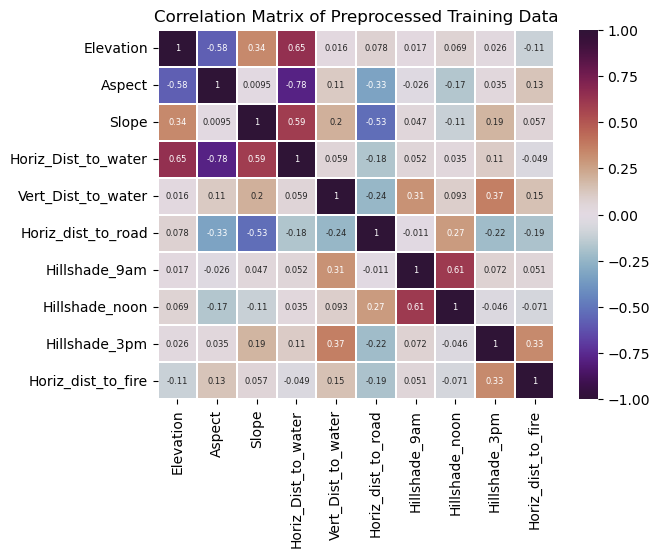

In [28]:
labels = list(X_train_prep.columns)
labels[3], labels[4], labels[5], labels[9] = 'Horiz_Dist_to_water', 'Vert_Dist_to_water', 'Horiz_dist_to_road', 'Horiz_dist_to_fire'
print(labels)
corr_matrix = X_train_prep.iloc[:, 0:10].corr(method='pearson', min_periods=1)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, linewidths=0.1, annot_kws={"fontsize":6}, cmap='twilight_shifted', xticklabels=labels[0:10], yticklabels=labels[0:10])
plt.title('Correlation Matrix of Preprocessed Training Data')

FINAL PIPELINE
Models:
Logistic Regression (l2)
KNN
XGboost
RandomForest

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

minmax_ftrs = ['Aspect', 'Hillshade_9am', 'Hillshade_noon', 'Hillshade_3pm']
std_ftrs = ['Elevation', 'Slope', 'Horizontal_distance_to_hydrology', 
            'Vertical_distance_to_hydrology', 
            'Horizontal_distance_to_roadways', 'Horizontal_distance_to_fire']

preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)],
        remainder='passthrough')

#
X = df.drop(columns='Cover_type')
#applied -1 so values would be from 0-6 (compatible with xgboost)
y = df.Cover_type -1

In [30]:
models = {
    'logistic_regression': LogisticRegression(penalty='l2', solver='liblinear', random_state=42),
    'knn': KNeighborsClassifier(),
    'xgboost': XGBClassifier(eval_metric='logloss', random_state=42),
    'random_forest': RandomForestClassifier(random_state=42)
}
param_grids = {
    'logistic_regression': {
        'classifier__C': [10, 100, 1000],  #regularization strength
    },
    'knn': {
        'classifier__n_neighbors': [2, 3, 5],
        'classifier__weights': ['uniform', 'distance'],
    },
    'xgboost': {
        'classifier__max_depth': [18, 25, 30],
        'classifier__learning_rate': [0.1, 0.2, 0.4],
        'classifier__n_estimators': [300, 400, 500],
    },
    'random_forest': {
        'classifier__max_depth': [40, 48, 53],
        'classifier__max_features': [0.5, 0.75, 1.0],
    },
}


nr_states = 3
#used dictionaries for storage of scores and models
test_scores = {model_name: np.zeros(nr_states) for model_name in models.keys()}
final_models = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
    print(f"\n--- Processing model: {model_name} ---")
    param_grid = param_grids[model_name]

    for i in range(nr_states):
        #sub-sampling because the dataset is too large. Running with Oscar still took me several hours
        #still stratifying in the subsampling to get effective results
        #only working with X_subset and y_subset (20% of total is still over 100k samples)
        X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42*i)

        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X_subset,y_subset,test_size = 0.2,stratify=y_subset,random_state=42*i)

        # splitter for other
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

        # let's put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor), 
            ('scaler', StandardScaler()),
            ('classifier', model)]) 

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring = 'accuracy',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        # this line fits the model on other and loops through the 4 different validation sets
        grid.fit(X_other, y_other)
        
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)

        print(f"Best model parameters for {model_name}: {grid.best_params_}")
        print(f"Validation score for {model_name}: {grid.best_score_}")

        # Save the model
        final_models[model_name].append(grid)

        # Calculate and save the test score
        y_test_pred = grid.best_estimator_.predict(X_test)
        test_scores[model_name][i] = accuracy_score(y_test, y_test_pred)
        print(f"Test score for {model_name}: {test_scores[model_name][i]}")

#summary of results
print("\n--- Final Test Scores ---")
for model_name, scores in test_scores.items():
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")


--- Processing model: logistic_regression ---
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/users/amanioud/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best model parameters for logistic_regression: {'classifier__C': 100}
Validation score for logistic_regression: 0.7123309415352312
Test score for logistic_regression: 0.7071984854352222
Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best model parameters for logistic_regression: {'classifier__C': 1000}
Validation score for logistic_regression: 0.7146437591632272
Test score for logistic_regression: 0.7077148143367324
Fitting 4 folds for each of 3 candidates, totalling 12 fits


/users/amanioud/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best model parameters for logistic_regression: {'classifier__C': 100}
Validation score for logistic_regression: 0.7142672679506312
Test score for logistic_regression: 0.7121466374080289

--- Processing model: knn ---
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best model parameters for knn: {'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
Validation score for knn: 0.8737104955068943
Test score for knn: 0.888386902456865
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best model parameters for knn: {'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
Validation score for knn: 0.8759372083291583
Test score for knn: 0.8863646142592831
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best model parameters for knn: {'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
Validation score for knn: 0.8729252101252009
Test score for knn: 0.8875263542876812

--- Processing model: xgboost ---
Fitting 4 folds for each o

/users/amanioud/anaconda3/envs/data1030/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best model parameters for xgboost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 25, 'classifier__n_estimators': 500}
Validation score for xgboost: 0.9306375907472852
Test score for xgboost: 0.9386429155371971
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best model parameters for xgboost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 25, 'classifier__n_estimators': 500}
Validation score for xgboost: 0.9293574772082485
Test score for xgboost: 0.9399767651994321
Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best model parameters for xgboost: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 30, 'classifier__n_estimators': 400}
Validation score for xgboost: 0.9286367421964314
Test score for xgboost: 0.9406221763263198

--- Processing model: random_forest ---
Fitting 4 folds for each of 9 candidates, totalling 36 fits


Results (graphs, confusion matrix, f1 score, etc.)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [ ]:
#create a dictionary to store F1 scores
f1_scores = {model_name: np.zeros(nr_states) for model_name in models.keys()}

for model_name, model_grids in final_models.items():
    print(f"\n--- Calculating F1 Scores for model: {model_name} ---")
    
    for i in range(nr_states):
        #extract the best model for the current state
        best_model = model_grids[i].best_estimator_
        
        #predict on the test set
        y_test_pred = best_model.predict(X_test)
        
        #calculate the F1 score
        f1 = f1_score(y_test, y_test_pred, average='weighted')#weighted for multi-class
        f1_scores[model_name][i] = f1
        
        print(f"F1 Score for state {i+1}: {f1:.4f}")

#summary of F1 scores
print("\n--- Final F1 Scores ---")
for model_name, scores in f1_scores.items():
    print(f"{model_name}: {scores.mean():.4f} ± {scores.std():.4f}")


NameError: name 'models' is not defined

In [ ]:
from sklearn.dummy import DummyClassifier

#most frequent class for f1 score using dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

dummy_clf.fit(X_other, y_other)

y_dummy_pred = dummy_clf.predict(X_test)

baseline_f1 = f1_score(y_test, y_dummy_pred, average='weighted')

print(f"Baseline F1 Score (most frequent class): {baseline_f1:.4f}")

Baseline F1 Score (most frequent class): 0.3196


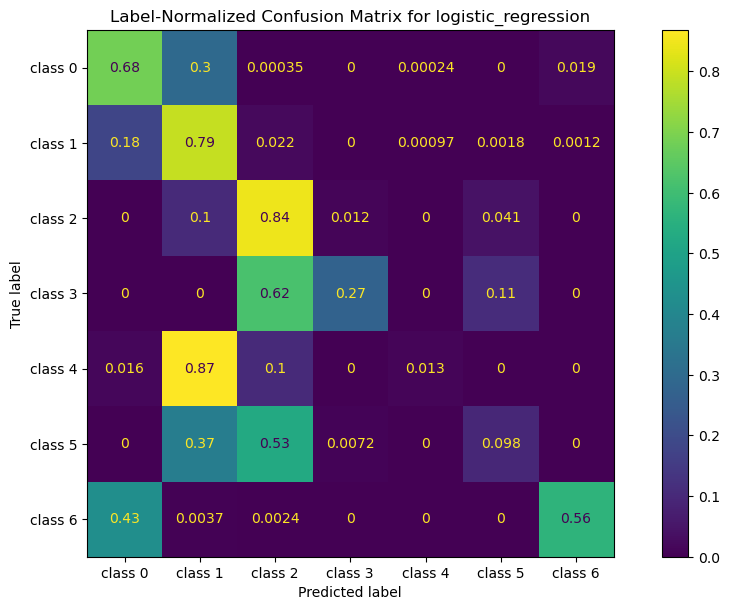

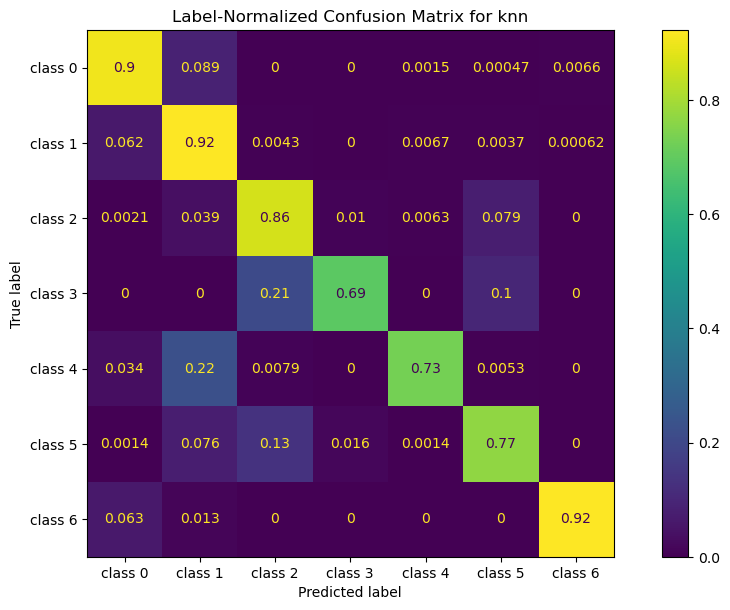

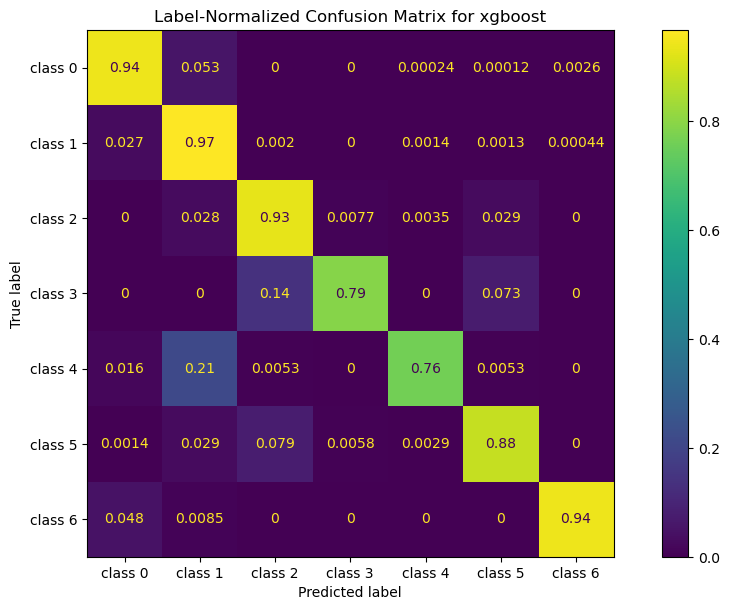

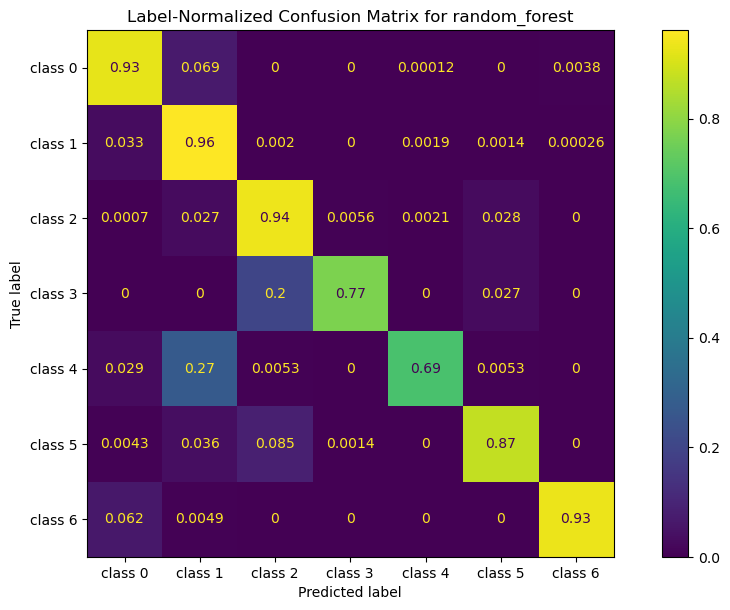

In [ ]:
for model in models.keys():
    cm = confusion_matrix(y_test, final_models[model][1].best_estimator_.predict(X_test), normalize='true')
    disp = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6'])
    fig, ax = plt.subplots(figsize=(10,6))
    disp.plot(ax=ax)
    plt.tight_layout()
    plt.title(f'Label-Normalized Confusion Matrix for {model}')
    plt.show()

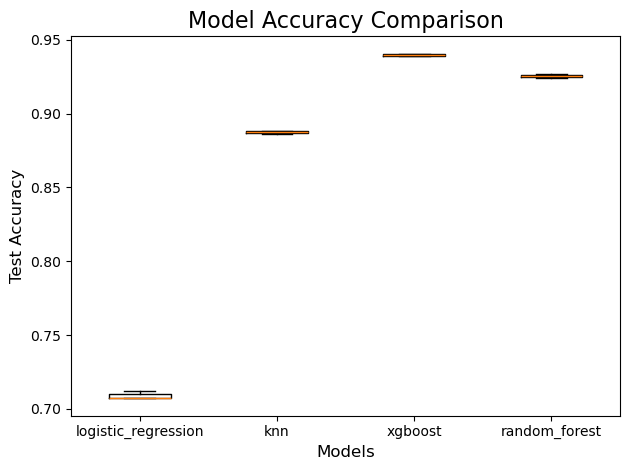

In [ ]:
#graphs
plt.boxplot(test_scores.values(), tick_labels=test_scores.keys())
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#XGboost perturbation

num_runs = 10
feature_names = X_test.columns
scores = np.zeros([len(feature_names), num_runs])

XGB = final_models['xgboost'][2]

test_score = XGB.score(X_test, y_test)

#loop through the features
for i in range(len(feature_names)):
    print('shuffling '+str(feature_names[i]))
    acc_scores = []
    for j in range(num_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(X_test[feature_names[i]].values)
        acc_scores.append(XGB.score(X_test_shuffled,y_test))
    print('shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling Elevation
shuffled test score: 0.491 +/- 0.003
shuffling Aspect
shuffled test score: 0.932 +/- 0.001
shuffling Slope
shuffled test score: 0.934 +/- 0.001
shuffling Horizontal_distance_to_hydrology
shuffled test score: 0.873 +/- 0.001
shuffling Vertical_distance_to_hydrology
shuffled test score: 0.906 +/- 0.001
shuffling Horizontal_distance_to_roadways
shuffled test score: 0.765 +/- 0.002
shuffling Hillshade_9am
shuffled test score: 0.923 +/- 0.001
shuffling Hillshade_noon
shuffled test score: 0.913 +/- 0.001
shuffling Hillshade_3pm
shuffled test score: 0.935 +/- 0.0
shuffling Horizontal_distance_to_fire
shuffled test score: 0.794 +/- 0.002
shuffling Wilderness_area1
shuffled test score: 0.904 +/- 0.001
shuffling Wilderness_area2
shuffled test score: 0.938 +/- 0.0
shuffling Wilderness_area3
shuffled test score: 0.927 +/- 0.0
shuffling Wilderness_area4
shuffled test score: 0.94 +/- 0.0
shuffling Soil_Type1
shuffled test score: 0.941 +/- 0.0
shuffling Soil_Type2
shuffled test sc

/tmp/ipykernel_1247010/3776194190.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[top_features].T, labels=np.array(feature_names)[top_features], vert=False, showfliers=False)


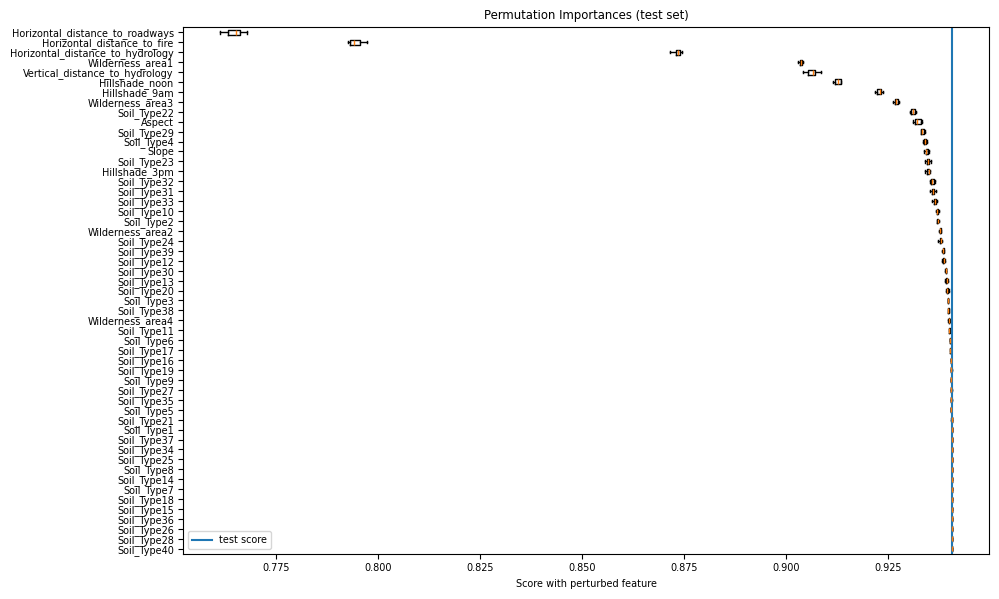

In [ ]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
top_features = sorted_indcs[:-1]
plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(10,6))
plt.boxplot(scores[top_features].T, labels=np.array(feature_names)[top_features], vert=False, showfliers=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('Score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

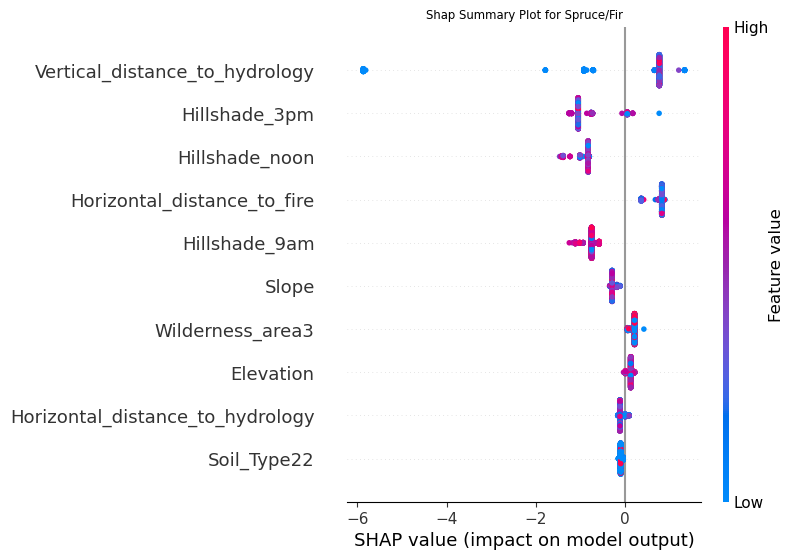

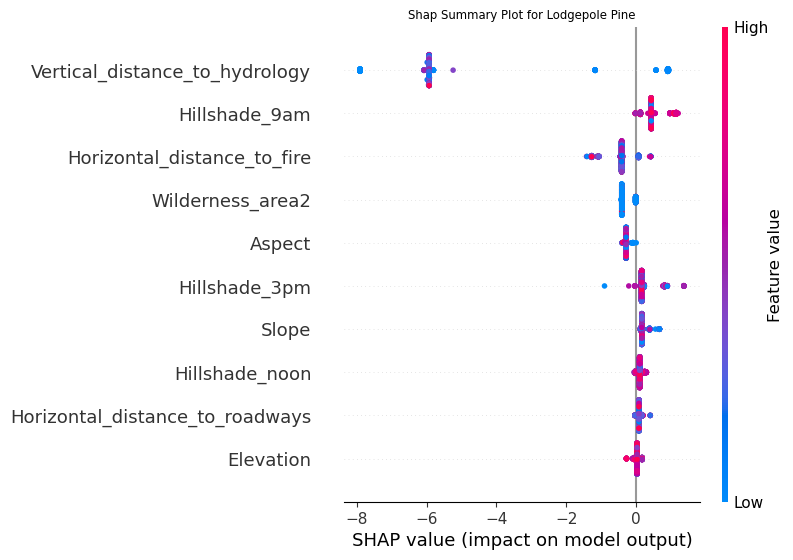

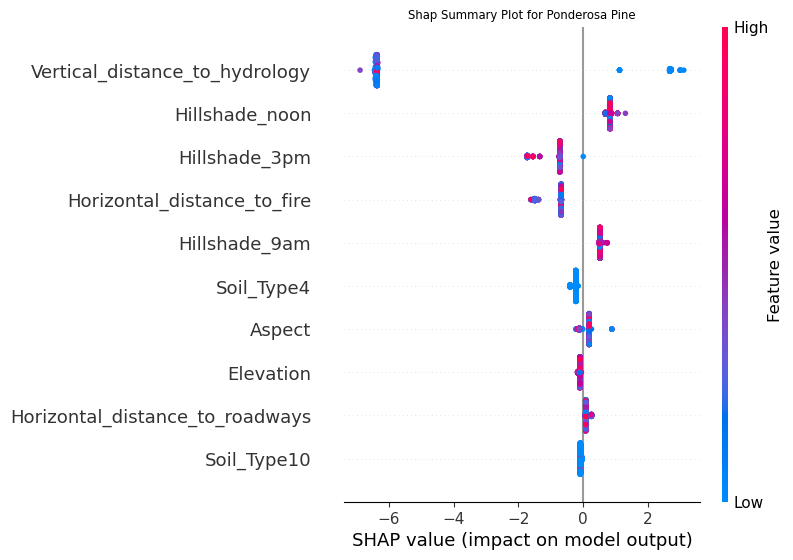

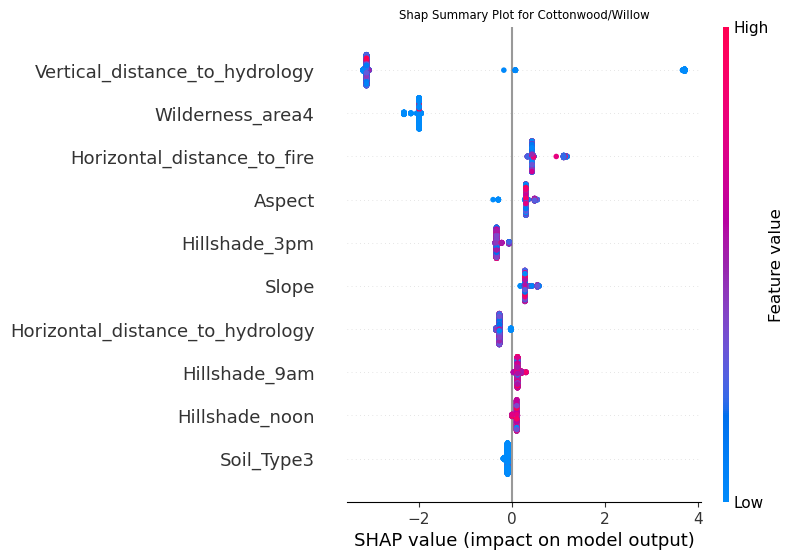

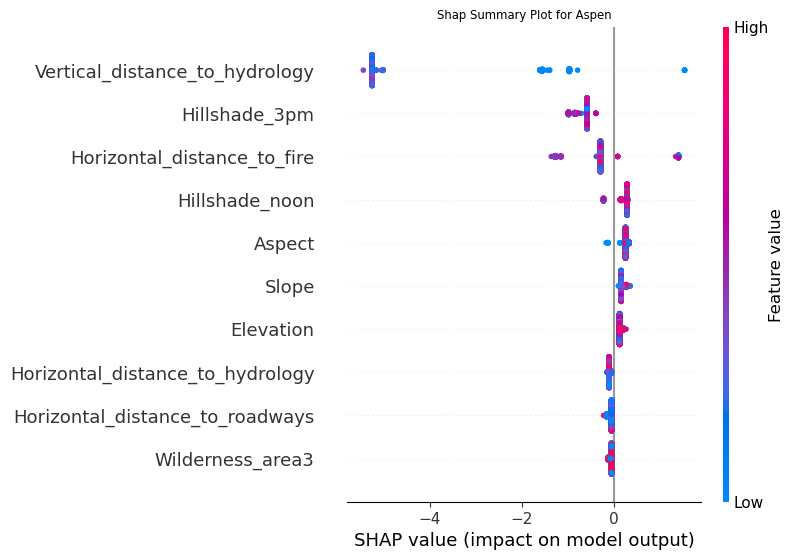

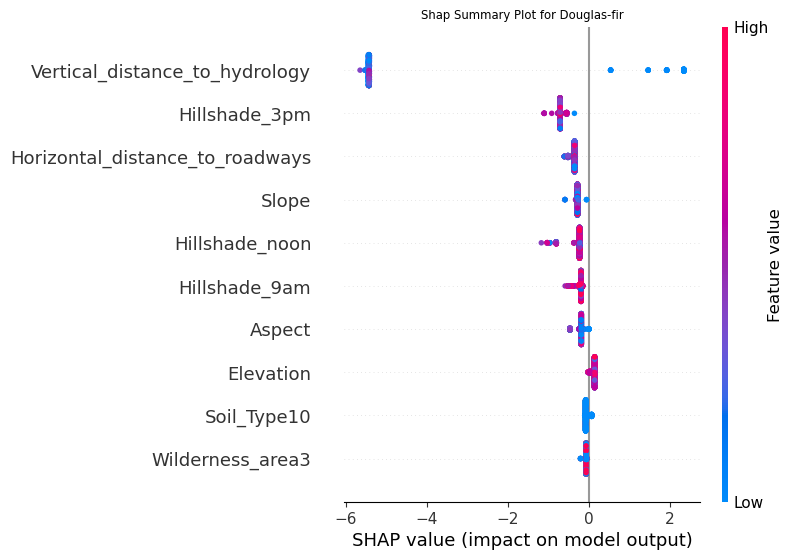

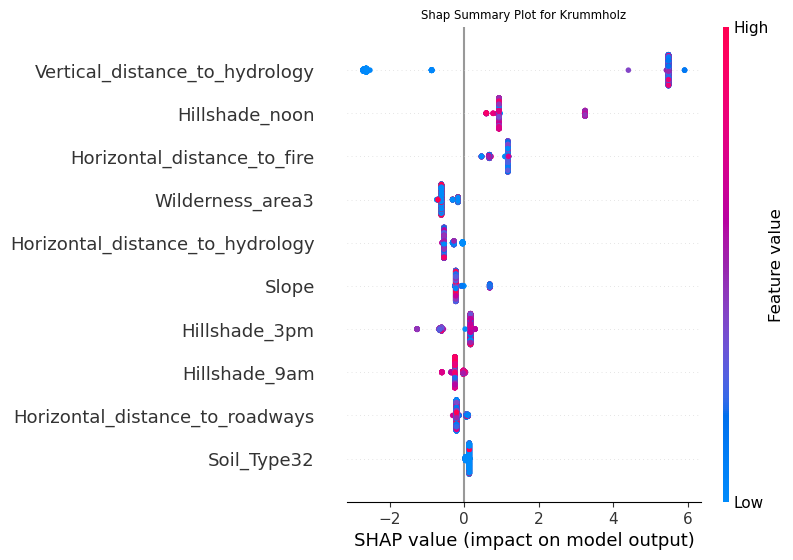

In [ ]:
#using shap method
import shap
shap.initjs()

explainer = shap.TreeExplainer(XGB.best_estimator_.steps[2][1])

#print(np.shape(X_test))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test[:1000])

#print(np.shape(shap_values))
for i in range(7):

    shap.summary_plot(shap_values[:,:,i], X_test[:1000], max_display=10, plot_type='dot', show=False)
    plt.title(f'Shap Summary Plot for {list(cover_type_dict.values())[i]}')
    plt.show()